### Fenics

Goal of the notebook : implement Fenics method

In [1]:
"""
FEniCS tutorial demo program: Poisson equation with Dirichlet conditions.
Test problem is chosen to give an exact solution at all nodes of the mesh.

  -Laplace(u) = f    in the unit square
            u = u_D  on the boundary

  u_D = 1 + x^2 + 2y^2
    f = -6
"""

from __future__ import print_function
from fenics import *

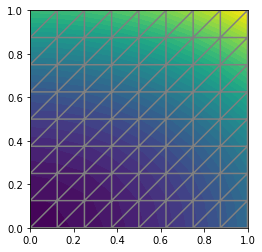

In [2]:
# Create mesh and define function space

mesh = UnitSquareMesh(8, 8)
V = FunctionSpace(mesh, 'P', 1)

# Define boundary condition
u_D = Expression('1 + x[0]*x[0] + 2*x[1]*x[1]', degree=2)

def boundary(x, on_boundary):
    return on_boundary

bc = DirichletBC(V, u_D, boundary)

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(-6.0)
a = dot(grad(u), grad(v))*dx
L = f*v*dx

# Compute solution
u = Function(V)
solve(a == L, u, bc)

# Plot solution and mesh
plot(u)
plot(mesh)

In [3]:
# Save solution to file in VTK format
vtkfile = File('poisson/solution.pvd')
vtkfile << u

In [5]:
# Compute error in L2 norm
error_L2 = errornorm(u_D, u, 'L2')

# Compute maximum error at vertices
vertex_values_u_D = u_D.compute_vertex_values(mesh)
vertex_values_u = u.compute_vertex_values(mesh)

import numpy as np

error_max = np.max(np.abs(vertex_values_u_D - vertex_values_u))

# Print errors
print('error_L2  =', error_L2)
print('error_max =', error_max)

error_L2  = 0.008235098073354827
error_max = 1.33226762955e-15


In [6]:
nodale_values_u = u.vector()

In [10]:
np.array(nodale_values_u)

array([ 3.      ,  2.53125 ,  3.015625,  2.125   ,  2.546875,  3.0625  ,
        1.78125 ,  2.140625,  2.59375 ,  3.140625,  1.5     ,  1.796875,
        2.1875  ,  2.671875,  3.25    ,  1.28125 ,  1.515625,  1.84375 ,
        2.265625,  2.78125 ,  3.390625,  1.125   ,  1.296875,  1.5625  ,
        1.921875,  2.375   ,  2.921875,  3.5625  ,  1.03125 ,  1.140625,
        1.34375 ,  1.640625,  2.03125 ,  2.515625,  3.09375 ,  3.765625,
        1.      ,  1.046875,  1.1875  ,  1.421875,  1.75    ,  2.171875,
        2.6875  ,  3.296875,  4.      ,  1.015625,  1.09375 ,  1.265625,
        1.53125 ,  1.890625,  2.34375 ,  2.890625,  3.53125 ,  1.0625  ,
        1.171875,  1.375   ,  1.671875,  2.0625  ,  2.546875,  3.125   ,
        1.140625,  1.28125 ,  1.515625,  1.84375 ,  2.265625,  2.78125 ,
        1.25    ,  1.421875,  1.6875  ,  2.046875,  2.5     ,  1.390625,
        1.59375 ,  1.890625,  2.28125 ,  1.5625  ,  1.796875,  2.125   ,
        1.765625,  2.03125 ,  2.      ])

In [11]:
len(np.array(nodale_values_u))

81

In [13]:
vertex_values_u = u.compute_vertex_values()

In [14]:
np.array(vertex_values_u)

array([ 1.      ,  1.015625,  1.0625  ,  1.140625,  1.25    ,  1.390625,
        1.5625  ,  1.765625,  2.      ,  1.03125 ,  1.046875,  1.09375 ,
        1.171875,  1.28125 ,  1.421875,  1.59375 ,  1.796875,  2.03125 ,
        1.125   ,  1.140625,  1.1875  ,  1.265625,  1.375   ,  1.515625,
        1.6875  ,  1.890625,  2.125   ,  1.28125 ,  1.296875,  1.34375 ,
        1.421875,  1.53125 ,  1.671875,  1.84375 ,  2.046875,  2.28125 ,
        1.5     ,  1.515625,  1.5625  ,  1.640625,  1.75    ,  1.890625,
        2.0625  ,  2.265625,  2.5     ,  1.78125 ,  1.796875,  1.84375 ,
        1.921875,  2.03125 ,  2.171875,  2.34375 ,  2.546875,  2.78125 ,
        2.125   ,  2.140625,  2.1875  ,  2.265625,  2.375   ,  2.515625,
        2.6875  ,  2.890625,  3.125   ,  2.53125 ,  2.546875,  2.59375 ,
        2.671875,  2.78125 ,  2.921875,  3.09375 ,  3.296875,  3.53125 ,
        3.      ,  3.015625,  3.0625  ,  3.140625,  3.25    ,  3.390625,
        3.5625  ,  3.765625,  4.      ])